In [1]:
##Define Parameters
α =  0.36; # Capital share in production function
β = 0.99; # Discount factor
δ = 0.025; # Depreciation rate

In [2]:
##Utility function
## TO FILL u(c)
function u(c)
    if c > 0
        return log(c)
    else
        return -10^9 
    end
end;
##Production function
## TO FILL F(k)
function F(k)
    return k^α
end;

In [3]:
##Defining the steady state
k_ss = (α/((1/β) - (1-δ)))^(1/(1-α));  # Steady State Capital Stock
y_ss = F(k_ss);                # Steady State Output
c_ss = y_ss - δ*k_ss;           # Steady State Consumption

In [4]:
##Defining the Grid for the Endogenous State Variable: Capital
nk = 501;                            # Number of Grid Points
kmin = 0.2*k_ss; kmax = 1.8*k_ss;    # Bounds for Grid
kg = kmin:(kmax-kmin)/(nk-1):kmax; # Equally Spaced Grid for Capital

In [5]:
## Build the 2-Dimensional Contemporaneous Utility Grid for the System
## TO FILL U: initialize the arra
U = Array{Float64}(undef, nk, nk)
for ii = 1:nk       # Loop Over Capital Today
    for jj = 1:nk   # Loop Over Capital Tomorrow
        k = kg[ii];     # Capital Today
        kp = kg[jj];    # Capital Tomorrow
        # Solve for Consumption at Each Point
        ## TO FILL
        c = F(k) + (1-δ)*k - kp
        if (kp < 0)||(c .< 0)
            # If Tomorrow"s Capital Stock | Today"s Consumption is Negative
            ## TO FILL
            U[ii,jj] = -10^9
            # Numerical Trick to ensure that the Value Function is never
            # optimised at these points
        else
            ## TO FILL
            # Calculate Utility at this Point on Grid
            U[ii,jj] = u(c)
        end
    end
end

In [8]:
##Value Function Iteration

#Initial Guess of the Value Function
V0 = ones(nk,1) # nk x 1 vector of initial guess

tol = 1e-4;
maxits = 3000; # Define the maximum number of iterations
V_1 = copy(V0);  # The new value function I obtain after an iteration
V_0 = copy(V0);  # the  value function from which I start in each new iteration
dif = 1;
policy_k_index = Array{Int64,1}(undef,nk);

for iter in 1:maxits
    if dif < tol
        println("Converged at iteration: $iter")
        break
    else 
        # TO FILL: find the fixed point of the Bellman equation ;)
        for ii in 1:nk
            vals = U[ii,:] .+ β .*V_0[:]
            V_1[ii], policy_k_index[ii] = findmax(vals)
        end
        dif = maximum(abs.(V_1 - V_0))
        V_0 =  copy(V_1)
    end
end

Converged at iteration: 910


In [9]:
##Policy function for capital
policy_k = Array{Float64,1}(undef,nk);
policy_k = kg[policy_k_index]


##Policy function for consumption
policy_c = Array{Float64,1}(undef,nk)

for k1 in 1:nk
    policy_c[k1] = F(kg[k1]) + (1-δ)*kg[k1] - policy_k[k1]
end

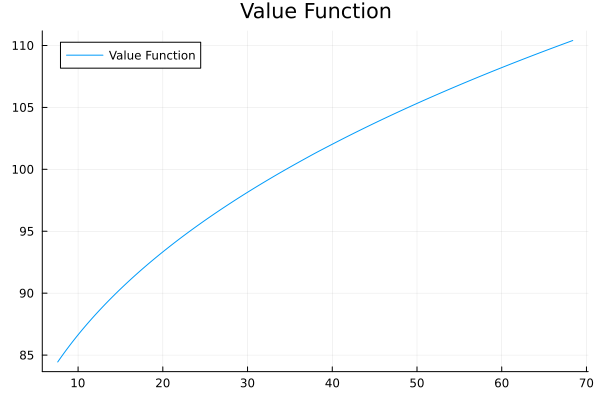

In [10]:
##Plotting the results
using Plots
plot(kg,V_1,title="Value Function",label="Value Function")

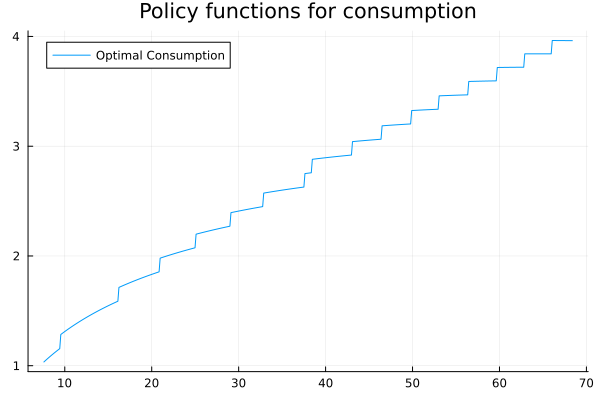

In [11]:
plot(kg,policy_c,title="Policy functions for consumption",label="Optimal Consumption")

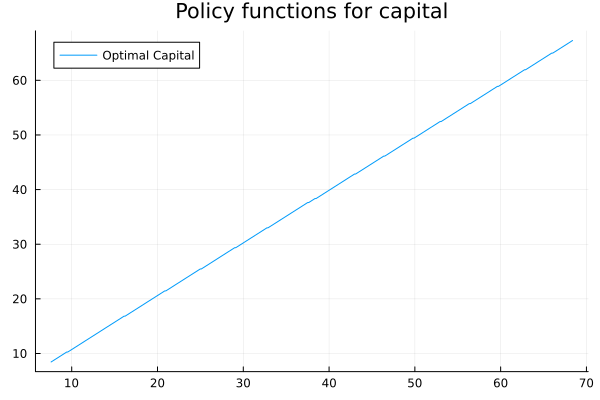

In [12]:
plot(kg,policy_k,title="Policy functions for capital",label="Optimal Capital")

In [20]:
## Bonus
V0_b = ones(nk,1) # nk x 1 vector of initial guess
for i in 1:nk
   V0_b[i] = U[i,i] / (1 - β)  # assuming that the agent keeps the same amount capital forever
end
tol = 1e-4;
maxits = 3000; # Define the maximum number of iterations
V_1_b = copy(V0_b);  # The new value function I obtain after an iteration
V_0_b = copy(V0_b);  # the  value function from which I start in each new iteration
dif = 1;
policy_k_index = Array{Int64,1}(undef,nk);

for iter in 1:maxits
    if dif < tol
        println("Converged at iteration: $iter")
        break
    else 
        # TO FILL: find the fixed point of the Bellman equation ;)
        for ii in 1:nk
            vals = U[ii,:] .+ β .*V_0_b[:]
            V_1_b[ii], policy_k_index[ii] = findmax(vals)
        end
        dif = maximum(abs.(V_1_b - V_0_b))
        V_0_b =  copy(V_1_b)
    end
end

Converged at iteration: 92


Changing the guess by the constant capital assumption greatly improved the performance.